In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import argparse
SEED = 2025


In [3]:
def load_data(path):

    new_cols = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'potential_issue', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
    
    data = pd.read_csv(path)
    if 'sku' in data.columns:
        data = data.drop(columns=['sku'])
    
    data = data.reindex(columns=new_cols)
    data = data.apply(lambda x: x.astype(float) if x.dtype == 'int64' else x)

    return data

def preprocess_data(train_data, test_data):
    """
    Preprocess the dataset by:
    - Removing rows with missing values.
    - Encoding categorical variables.
    - Scaling numerical features.
    """
    # Remove rows with missing values
    train_data = train_data.dropna()
    test_data tr= test_data.dropna()

    # Get column indices for numerical columns
    numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
    numerical_indices = [train_data.columns.get_loc(col) for col in numerical_cols]
    
    # Normalize numerical features
    scaler = StandardScaler()
    train_data.iloc[:, numerical_indices] = scaler.fit_transform(train_data.iloc[:, numerical_indices])
    test_data.iloc[:, numerical_indices] = scaler.transform(test_data.iloc[:, numerical_indices])  # Use the same scaler

    # Get column indices for object (categorical) columns
    categorical_cols = train_data.select_dtypes(include=['object']).columns
    categorical_indices = [train_data.columns.get_loc(col) for col in categorical_cols]
    
    # Encode categorical variables
    for idx in categorical_indices:
        # Map 'No' to 0 and 'Yes' to 1, convert to int
        train_data.iloc[:, idx] = train_data.iloc[:, idx].map({'No': 0, 'Yes': 1}).astype(int)
        test_data.iloc[:, idx] = test_data.iloc[:, idx].map({'No': 0, 'Yes': 1}).astype(int)
    
    
    return train_data, test_data

In [4]:
# Load the datasets
train_path = "data1/Kaggle_Test_Dataset_v2.csv.gz"
test_path = "data1/Kaggle_Training_Dataset_v2.csv.gz"

train_data = load_data(train_path)
test_data = load_data(test_path)

# Preprocess the data
X_train, X_test = preprocess_data(train_data, test_data)


/var/folders/cp/5dh6h31947d4c7zjk6xxcw9r0000gn/T/ipykernel_29173/2777445999.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)
/var/folders/cp/5dh6h31947d4c7zjk6xxcw9r0000gn/T/ipykernel_29173/2777445999.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [43]:
X_test.shape

(1586967, 22)

In [34]:
X_train.shape

(227351, 22)

In [9]:
df = pd.concat([X_train, X_test])

In [15]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,-0.015848,0.010933,-0.049805,-0.033024,-0.035548,-0.037017,-0.036963,-0.036458,-0.037853,-0.037469,...,0.150344,0.135080,-0.018856,0,0,0,0,1,0,0
3,-0.016114,-0.841171,-0.049805,-0.033024,-0.035548,-0.037017,-0.036963,-0.036458,-0.037853,-0.037327,...,0.140135,0.118199,-0.018856,0,0,0,1,1,0,0
4,-0.016346,0.010933,-0.049805,-0.033024,-0.035548,-0.037017,-0.036963,-0.036458,-0.037853,-0.037469,...,0.122633,0.114823,-0.018856,0,0,0,0,1,0,0
5,-0.015915,-0.841171,-0.049805,-0.033024,-0.035548,-0.037017,-0.036963,-0.036458,-0.037744,-0.037327,...,0.110235,0.112291,-0.018856,0,0,0,0,1,0,0
13,-0.009513,1.147071,-0.049805,-0.033024,-0.035548,-0.037017,-0.036963,-0.036458,-0.037853,-0.037469,...,0.131384,0.108915,-0.018856,0,0,0,0,1,0,0


In [10]:
corr_matrix = df.corr()

In [11]:
#corr_matrix

In [6]:
train_rus_df.shape

(5208, 22)

In [9]:
test_df.shape

(1586967, 22)

In [24]:
combined_data.shape

(1929937, 22)

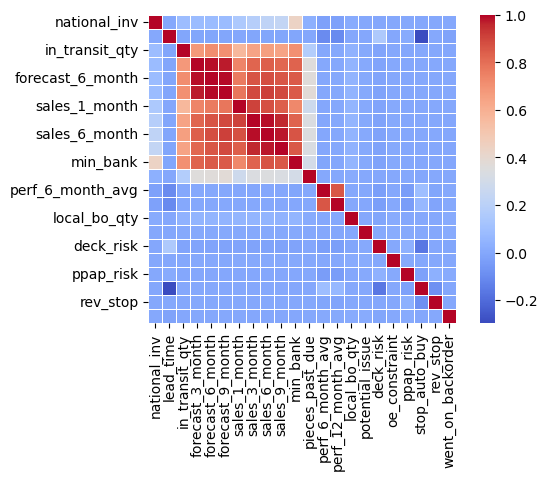

In [57]:
X_train, X_test = preprocess_data(train_data, test_data)
df = pd.concat([X_train, X_test])
corr_matrix = df.corr()
plt.figure(figsize=(6, 4)) 
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True, linewidths=0.5)
folder_path = 'output' 
os.makedirs(folder_path, exist_ok=True) 
file_path = os.path.join(folder_path, 'correlation_matrix.pdf')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()


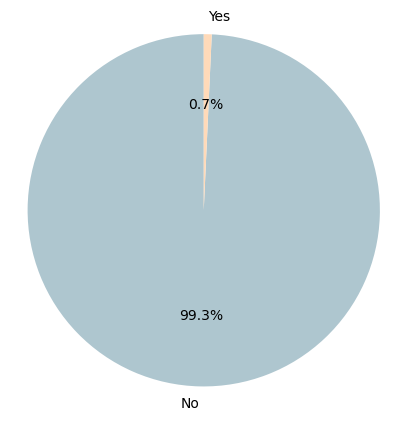

In [44]:
import matplotlib.pyplot as plt

combined_data = pd.concat([train_data, test_data], axis=0)

# Replace with your actual target column name
target_column = 'went_on_backorder'  # e.g., 'target', 'y'

# Count the values of 'Yes' and 'No'
value_counts = combined_data[target_column].value_counts()

# Use pastel colors
pastel_colors = ['#AEC6CF', '#FFDAB9']

folder_path = 'output'
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, 'Two_Class_Distribution_in_Target_Variable.pdf')

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        colors=pastel_colors,
        startangle=90)

# Add a clear title
#plt.title('Distribution of Target Variable (Yes / No)', fontsize=14)

plt.axis('equal') 
plt.show()


In [43]:
# Create folder to save if it doesn't exist
folder_path = 'output'
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, 'Two_Class_Distribution_in_Target_Variable.pdf')

/var/folders/cp/5dh6h31947d4c7zjk6xxcw9r0000gn/T/ipykernel_29173/332456569.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='went_on_backorder', y='lead_time', data=df, palette="Set2")


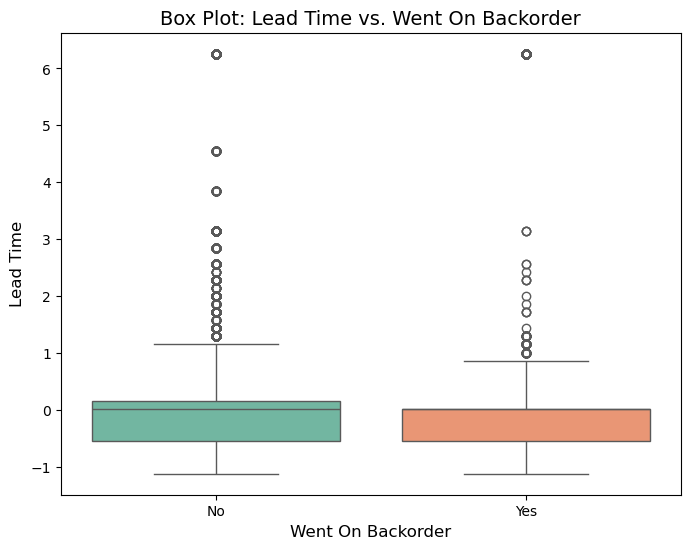

ValueError: Could not interpret value `sales` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains the combined dataset of X_train and X_test
# Assuming 'went_on_backorder' is the target variable, and it's in 'train_data' or similar

# Add the target variable back to the dataframe for visualization
df['went_on_backorder'] = pd.concat([train_data['went_on_backorder'], test_data['went_on_backorder']], axis=0).reset_index(drop=True)

# Example 1: Box Plot for 'lead_time' vs target 'went_on_backorder'
plt.figure(figsize=(8, 6))
sns.boxplot(x='went_on_backorder', y='lead_time', data=df, palette="Set2")
plt.title('Box Plot: Lead Time vs. Went On Backorder', fontsize=14)
plt.xlabel('Went On Backorder', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)
plt.show()

# Example 2: Box Plot for 'sales' vs target 'went_on_backorder'
plt.figure(figsize=(8, 6))
sns.boxplot(x='went_on_backorder', y='sales', data=df, palette="Set3")
plt.title('Box Plot: Sales vs. Went On Backorder', fontsize=14)
plt.xlabel('Went On Backorder', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

# Example 3: Box Plot for 'inventory' vs target 'went_on_backorder'
plt.figure(figsize=(8, 6))
sns.boxplot(x='went_on_backorder', y='inventory', data=df, palette="Pastel1")
plt.title('Box Plot: Inventory vs. Went On Backorder', fontsize=14)
plt.xlabel('Went On Backorder', fontsize=12)
plt.ylabel('Inventory', fontsize=12)
plt.show()
